In [84]:
#################################################################################################################################################
#
#                                          Set of tools for Analysis of XRD experimental data
#
##################################################################################################################################################
#################################################################################################################################################
#                                                            Loading of Packages
##################################################################################################################################################

import os
import math
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize, signal

from lmfit import models

Text(0, 0.5, 'Probablity')

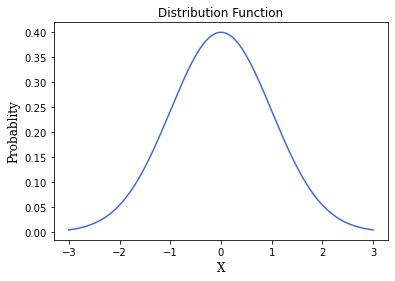

In [89]:
######################################################################################################################
#
#           Artificial generation of Gaussian Distribution function in the range from -3 to 3
#
######################################################################################################################

def g(x, A, μ, σ):
    return A / (σ * math.sqrt(2 * math.pi)) * np.exp(-(x-μ)**2 / (2*σ**2))

x = np.linspace(-3, 3, 1000)

fig, ax = plt.subplots()

ax.plot(x, g(x, 1, 0, 1), color  = 'royalblue')

plt.title('Distribution Function')
plt.xlabel("X", color = "black", family = "Serif", fontsize = 12)
plt.ylabel("Probablity", color = "black", family = "Serif", fontsize = 12)



Text(0, 0.5, 'Probablity')

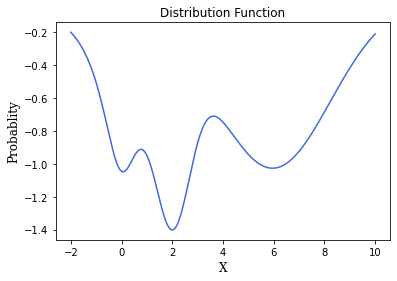

In [88]:
######################################################################################################################
#
#           Artificial generation of composed curves by adding two Distribution Functions
#
######################################################################################################################

def f(x):
    return np.exp(-(x-2)**2) + np.exp(-(x-6)**2/10) + 1/(x**2 + 1)

x = np.linspace(-2, 10, 1000)
fig, ax = plt.subplots()

ax.plot(x, -f(x), color = 'royalblue')
plt.title('Distribution Function')
plt.xlabel("X", color = "black", family = "Serif", fontsize = 12)
plt.ylabel("Probablity", color = "black", family = "Serif", fontsize = 12)


In [6]:


print('|{:>16}|{:>16}|{:>16}|'.format('initial','iterations','minimum'))
initial_guess = -0.5
result = optimize.minimize(lambda x: -f(x), [initial_guess])
print(f'|{initial_guess:+16.1f}|{result.nit:>16}|{result.x[0]:16.3f}|')

initial_guess = -2
result = optimize.minimize(lambda x: -f(x), [initial_guess])
print(f'|{initial_guess:+16.1f}|{result.nit:>16}|{result.x[0]:16.3f}|')

initial_guess = 9
result = optimize.minimize(lambda x: -f(x), [initial_guess])
print(f'|{initial_guess:+16.1f}|{result.nit:>16}|{result.x[0]:16.3f}|')



|         initial|      iterations|         minimum|
|            -0.5|               5|           0.064|
|            -2.0|               4|           2.001|
|            +9.0|               3|           5.955|


Text(0, 0.5, 'Y axis')

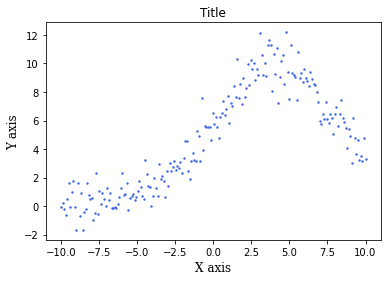

In [92]:
#####################################################################
#
#          Setting of the Distribution Function parameters
#
######################################################################

A = 100.0 # intensity
μ = 4.0  # mean
σ = 4.0 # peak width
n = 200
x = np.linspace(-10, 10, n)
y = g(x, A, μ, σ) + np.random.randn(n)

fig, ax = plt.subplots()
ax.scatter(x, y, s=2, color = 'royalblue')

plt.title('Title')
plt.xlabel("X axis", color = "black", family = "Serif", fontsize = 12)
plt.ylabel("Y axis", color = "black", family = "Serif", fontsize = 12)

In [8]:


def cost(parameters):
    a, b, c = parameters
    # y has been calculated in previous snippet
    return np.sum(np.power(g(x, a, b, c) - y, 2)) / len(x)

result = optimize.minimize(cost, [0, 0, 1])
print('steps', result.nit, result.fun)
print(f'amplitude: {result.x[0]:3.3f} mean: {result.x[1]:3.3f} sigma: {result.x[2]:3.3f}')



steps 15 0.9870450268464421
amplitude: 101.875 mean: 4.087 sigma: 4.070


Text(0, 0.5, 'Y axis')

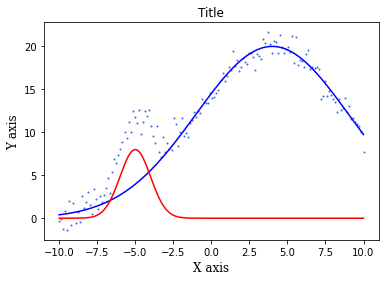

In [93]:
g_0 = [250.0, 4.0, 5.0]
g_1 = [20.0, -5.0, 1.0]
n = 150
x = np.linspace(-10, 10, n)
y = g(x, *g_0) + g(x, *g_1) + np.random.randn(n)

fig, ax = plt.subplots() # Setting plots together

ax.scatter(x, y, s=1, color = 'royalblue') # Scatter plots of the points to be 
ax.plot(x, g(x, *g_0), color = 'blue')
ax.plot(x, g(x, *g_1), color = 'red')

plt.title('Title')
plt.xlabel("X axis", color = "black", family = "Serif", fontsize = 12)
plt.ylabel("Y axis", color = "black", family = "Serif", fontsize = 12)

In [10]:


def cost(parameters):
    g_0 = parameters[:3]
    g_1 = parameters[3:6]
    return np.sum(np.power(g(x, *g_0) + g(x, *g_1) - y, 2)) / len(x)

initial_guess = [1, 0, 1, -1, 0, 1]
result = optimize.minimize(cost, initial_guess)
print('steps', result.nit, result.fun)
print(f'g_0: amplitude: {result.x[0]:3.3f} mean: {result.x[1]:3.3f} sigma: {result.x[2]:3.3f}')
print(f'g_1: amplitude: {result.x[3]:3.3f} mean: {result.x[4]:3.3f} sigma: {result.x[5]:3.3f}')



steps 67 0.7991578163106775
g_0: amplitude: 20.093 mean: -5.041 sigma: 0.942
g_1: amplitude: 249.327 mean: 4.022 sigma: 5.052


Text(0, 0.5, 'Y axis')

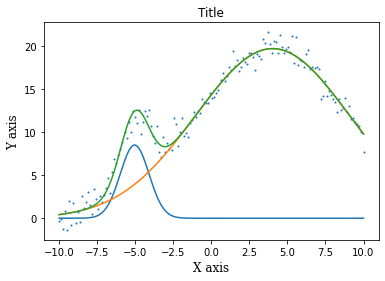

In [94]:
fig, ax = plt.subplots()

ax.scatter(x, y, s=1)
ax.plot(x, g(x, *result.x[:3]))
ax.plot(x, g(x, *result.x[3:6]))
ax.plot(x, g(x, *result.x[:3]) + g(x, *result.x[3:6]))

plt.title('Title')
plt.xlabel("X axis", color = "black", family = "Serif", fontsize = 12)
plt.ylabel("Y axis", color = "black", family = "Serif", fontsize = 12)

TypeError: cannot unpack non-iterable Figure object

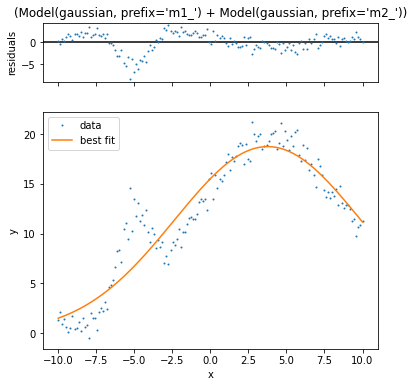

In [12]:
model_1 = models.GaussianModel(prefix='m1_')
model_2 = models.GaussianModel(prefix='m2_')
model = model_1 + model_2

params_1 = model_1.make_params(center=1, sigma=1)
params_2 = model_2.make_params(center=-1, sigma=1)
params = params_1.update(params_2)

output = model.fit(y, params, x=x)
fig, gridspec = output.plot(data_kws={'markersize': 1})

In [13]:


def generate_model(spec):
    composite_model = None
    params = None
    x = spec['x']
    y = spec['y']
    x_min = np.min(x)
    x_max = np.max(x)
    x_range = x_max - x_min
    y_max = np.max(y)
    for i, basis_func in enumerate(spec['model']):
        prefix = f'm{i}_'
        model = getattr(models, basis_func['type'])(prefix=prefix)
        if basis_func['type'] in ['GaussianModel', 'LorentzianModel', 'VoigtModel']: # for now VoigtModel has gamma constrained to sigma
            model.set_param_hint('sigma', min=1e-6, max=x_range)
            model.set_param_hint('center', min=x_min, max=x_max)
            model.set_param_hint('height', min=1e-6, max=1.1*y_max)
            model.set_param_hint('amplitude', min=1e-6)
            # default guess is horrible!! do not use guess()
            default_params = {
                prefix+'center': x_min + x_range * random.random(),
                prefix+'height': y_max * random.random(),
                prefix+'sigma': x_range * random.random()
            }
        else:
            raise NotImplemented(f'model {basis_func["type"]} not implemented yet')
        if 'help' in basis_func:  # allow override of settings in parameter
            for param, options in basis_func['help'].items():
                model.set_param_hint(param, **options)
        model_params = model.make_params(**default_params, **basis_func.get('params', {}))
        if params is None:
            params = model_params
        else:
            params.update(model_params)
        if composite_model is None:
            composite_model = model
        else:
            composite_model = composite_model + model
    return composite_model, params



TypeError: cannot unpack non-iterable Figure object

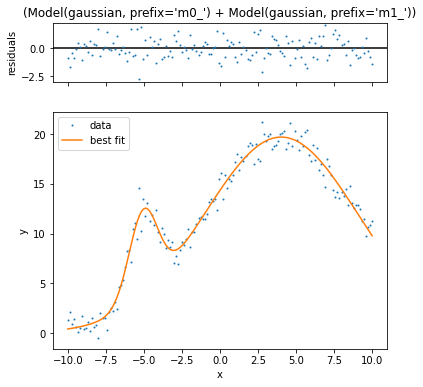

In [14]:


spec = {
    'x': x,
    'y': y,
    'model': [
        {'type': 'GaussianModel'},
        {'type': 'GaussianModel'}
    ]
}

model, params = generate_model(spec)
output = model.fit(spec['y'], params, x=spec['x'])
fig, gridspec = output.plot(data_kws={'markersize': 1})
plot_to_blog(fig, 'xrd-fitting-two-gaussian-noise-lmfit-spec.png')



In [15]:


def update_spec_from_peaks(spec, model_indicies, peak_widths=(10, 25), **kwargs):
    x = spec['x']
    y = spec['y']
    x_range = np.max(x) - np.min(x)
    peak_indicies = signal.find_peaks_cwt(y, peak_widths)
    np.random.shuffle(peak_indicies)
    for peak_indicie, model_indicie in zip(peak_indicies.tolist(), model_indicies):
        model = spec['model'][model_indicie]
        if model['type'] in ['GaussianModel', 'LorentzianModel', 'VoigtModel']:
            params = {
                'height': y[peak_indicie],
                'sigma': x_range / len(x) * np.min(peak_widths),
                'center': x[peak_indicie]
            }
            if 'params' in model:
                model.update(params)
            else:
                model['params'] = params
        else:
            raise NotImplemented(f'model {basis_func["type"]} not implemented yet')
    return peak_indicies



In [16]:
spec = {
    'x': df.index.values,
    'y': df['count'].values,
    'model': [
        {'type': 'VoigtModel'},
        {'type': 'VoigtModel'},
        {'type': 'VoigtModel'},
        {'type': 'VoigtModel'},
        {'type': 'GaussianModel'},
        {'type': 'GaussianModel'},
        {'type': 'GaussianModel'},
        {'type': 'GaussianModel'},
    ]
}

peaks_found = update_spec_from_peaks(spec, [0, 1, 2, 3, 4, 5, 6], peak_widths=(15,))
fig, ax = plt.subplots()
ax.scatter(spec['x'], spec['y'], s=4)
for i in peaks_found:
    ax.axvline(x=spec['x'][i], c='black', linestyle='dotted')


NameError: name 'df' is not defined

TypeError: cannot unpack non-iterable Figure object

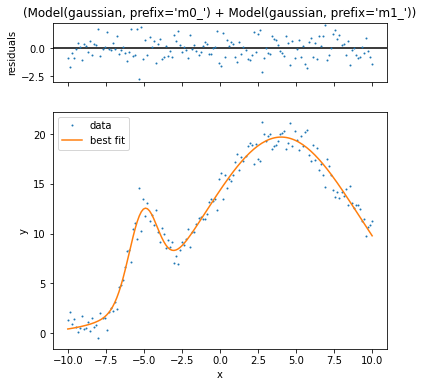

In [96]:
model, params = generate_model(spec)
output = model.fit(spec['y'], params, x=spec['x'])
fig, gridspec = output.plot(data_kws={'markersize':  1})



2


Text(0, 0.5, 'Y axis')

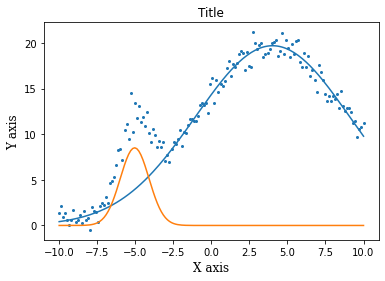

In [98]:
fig, ax = plt.subplots()
ax.scatter(spec['x'], spec['y'], s=4)
components = output.eval_components(x=spec['x'])
print(len(spec['model']))
for i, model in enumerate(spec['model']):
    ax.plot(spec['x'], components[f'm{i}_'])
    
plt.title('Title')
plt.xlabel("X axis", color = "black", family = "Serif", fontsize = 12)
plt.ylabel("Y axis", color = "black", family = "Serif", fontsize = 12)

In [20]:
spec = {
    'x': df.index.values,
    'y': df['count'].values,
    'model': [
        {
            'type': 'GaussianModel',
            'params': {'center': 34.11, 'height': 13.08, 'sigma': 0.1},
            'help': {'center': {'min': 33.5, 'max': 34.5}}
        },
        {
            'type': 'VoigtModel',
            'params': {'center': 36.37, 'height': 30.94, 'sigma': 0.1, 'gamma': 0.1},
            'help': {'center': {'min': 35, 'max': 37}}
        },
        {'type': 'GaussianModel', 'params': {'center': 39.57, 'height': 76.56, 'sigma': 0.1}},
        {
            'type': 'GaussianModel',
            'params': {'center': 40.85, 'height': 30.77, 'sigma': 0.1},
            'help': {'center': {'min': 40, 'max': 42}}
        },
        {'type': 'VoigtModel', 'params': {'center': 41.73, 'height': 38.44, 'sigma': 0.05, 'gamma': 0.15}},
        {
            'type': 'GaussianModel',
            'params': {'center': 42.55, 'height': 45.29, 'sigma': 0.1},
            'help': {'center': {'min': 42, 'max': 43}}
        },
        {'type': 'GaussianModel', 'help': {'center': {'max': 39.2}}},
        #{'type': 'GaussianModel'},
        #{'type': 'GaussianModel'}
    ]
}

model, params = generate_model(spec)
output = model.fit(spec['y'], params, x=spec['x'])
fig, gridspec = output.plot(data_kws={'markersize': 1})

NameError: name 'df' is not defined

2


Text(0, 0.5, 'Y axis')

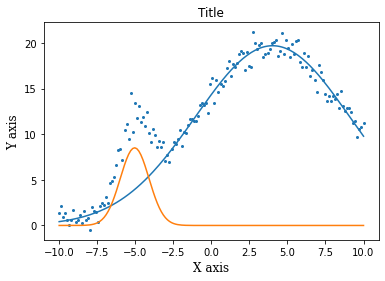

In [99]:
fig, ax = plt.subplots()
ax.scatter(spec['x'], spec['y'], s=4)
components = output.eval_components(x=spec['x'])
print(len(spec['model']))
for i, model in enumerate(spec['model']):
    ax.plot(spec['x'], components[f'm{i}_'])
    
plt.title('Title')
plt.xlabel("X axis", color = "black", family = "Serif", fontsize = 12)
plt.ylabel("Y axis", color = "black", family = "Serif", fontsize = 12)

In [23]:


def print_best_values(spec, output):
    model_params = {
        'GaussianModel':   ['amplitude', 'sigma'],
        'LorentzianModel': ['amplitude', 'sigma'],
        'VoigtModel':      ['amplitude', 'sigma', 'gamma']
    }
    best_values = output.best_values
    print('center    model   amplitude     sigma      gamma')
    for i, model in enumerate(spec['model']):
        prefix = f'm{i}_'
        values = ', '.join(f'{best_values[prefix+param]:8.3f}' for param in model_params[model["type"]])
        print(f'[{best_values[prefix+"center"]:3.3f}] {model["type"]:16}: {values}')



In [26]:
image_dir = "C:/Users/renea/Desktop"

def plot_to_blog(fig, figure_name):
    filename = os.path.expanduser(f'{image_dir}/{figure_name}')
    fig.savefig(filename)
    return filename

Text(20.625, 0.5, 'Y axis')

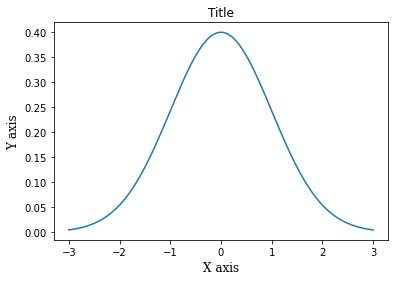

In [100]:


def g(x, A, μ, σ):
    return A / (σ * math.sqrt(2 * math.pi)) * np.exp(-(x-μ)**2 / (2*σ**2))

x = np.linspace(-3, 3, 1000)
fig, ax = plt.subplots()
ax.plot(x, g(x, 1, 0, 1))
plot_to_blog(fig, 'xrd-fitting-gaussian.png')

plt.title('Title')
plt.xlabel("X axis", color = "black", family = "Serif", fontsize = 12)
plt.ylabel("Y axis", color = "black", family = "Serif", fontsize = 12)